In [204]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import csv
from scipy.stats import linregress
from sklearn import datasets


covid_states = pd.read_csv("resources/Covid/10-24-2020.csv")
state_median_income =  pd.read_csv("resources/Covid/raw_data.csv")



In [205]:
covid_states = pd.DataFrame(covid_states)
state_median_income = pd.DataFrame(state_median_income)


In [206]:
covid_states.head()
covid_52 = covid_states.drop(axis=0, index=[2, 9, 13, 14, 39, 52])
covid = covid_52.set_index(['Province_State'])
covid.head()


,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
Province_State,,,,,,,,,,,,,,,,,
Alabama,US,2020-10-25 04:30:24,32.3182,-86.9023,183276,2866,74439.0,105971.0,1.0,3737.896898,1295868.0,NaN,1.563762,84000001,USA,26429.106795,NaN
Alaska,US,2020-10-25 04:30:24,61.3707,-152.4044,12485,68,6939.0,5478.0,2.0,1706.661928,552746.0,NaN,0.544654,84000002,USA,75558.714775,NaN
Arizona,US,2020-10-25 04:30:24,33.7298,-111.4312,236772,5869,39525.0,191378.0,4.0,3252.935923,1693549.0,NaN,2.478756,84000004,USA,23267.136227,NaN
Arkansas,US,2020-10-25 04:30:24,34.9697,-92.3731,105318,1797,93977.0,9544.0,5.0,3489.888674,1280018.0,NaN,1.706261,84000005,USA,42415.544548,NaN
California,US,2020-10-25 04:30:24,36.1162,-119.6816,903684,17343,NaN,886341.0,6.0,2287.099868,17609179.0,NaN,1.919144,84000006,USA,44566.409235,NaN


In [207]:

covid.columns


Index(['Country_Region', 'Last_Update', 'Lat', 'Long_', 'Confirmed', 'Deaths',
       'Recovered', 'Active', 'FIPS', 'Incident_Rate', 'People_Tested',
       'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3', 'Testing_Rate',
       'Hospitalization_Rate'],
      dtype='object')

In [268]:
states_data = covid[['Incident_Rate', 'Testing_Rate', 'Mortality_Rate', 'Confirmed', 'Deaths', 'People_Tested']]
states_data.head()


,Incident_Rate,Testing_Rate,Mortality_Rate,Confirmed,Deaths,People_Tested
Province_State,,,,,,
Alabama,3737.896898,26429.106795,1.563762,183276,2866,1295868.0
Alaska,1706.661928,75558.714775,0.544654,12485,68,552746.0
Arizona,3252.935923,23267.136227,2.478756,236772,5869,1693549.0
Arkansas,3489.888674,42415.544548,1.706261,105318,1797,1280018.0
California,2287.099868,44566.409235,1.919144,903684,17343,17609179.0


In [269]:
state_median_income.head(52)
state_52 = state_median_income.drop(index=[0, 2, 55, 56, 57, 58, 59, 60, 61, 62])
state_52.columns

Index(['Title: Median Annual Household Income | KFF', 'Unnamed: 1'], dtype='object')

In [270]:
state_income = state_52.set_index(['Title: Median Annual Household Income | KFF'])
state_income.columns

Index(['Unnamed: 1'], dtype='object')

In [271]:
covid_states = pd.merge(state_income, states_data, right_index=True, left_index=True)


In [303]:
combined = covid_states.rename(columns={'Unnamed: 1':'Median Household Income', 'Incident_Rate': 'Incident Rate', 
                                        'Testing_Rate': 'Testing Rate', 'Mortality_Rate': 'Mortality Rate', 'People_Tested': 'People Tested'})
combined.head()
combined.dtypes



Median Household Income     object
Incident Rate              float64
Testing Rate               float64
Mortality Rate             float64
Confirmed                    int64
Deaths                       int64
People Tested              float64
dtype: object

In [226]:
combined_bar = combined[['Median Household Income']]
combined_bar.head()

,Median Household Income
Alabama,48123.00
Alaska,73181.00
Arizona,56581.00
Arkansas,45869.00
California,71805.00


In [227]:
bar_data.dtypes
bar_data['Median Household Income'] = pd.to_numeric(bar_data['Median Household Income'], downcast="integer")
bar_data.dtypes

Median Household Income    int32
dtype: object

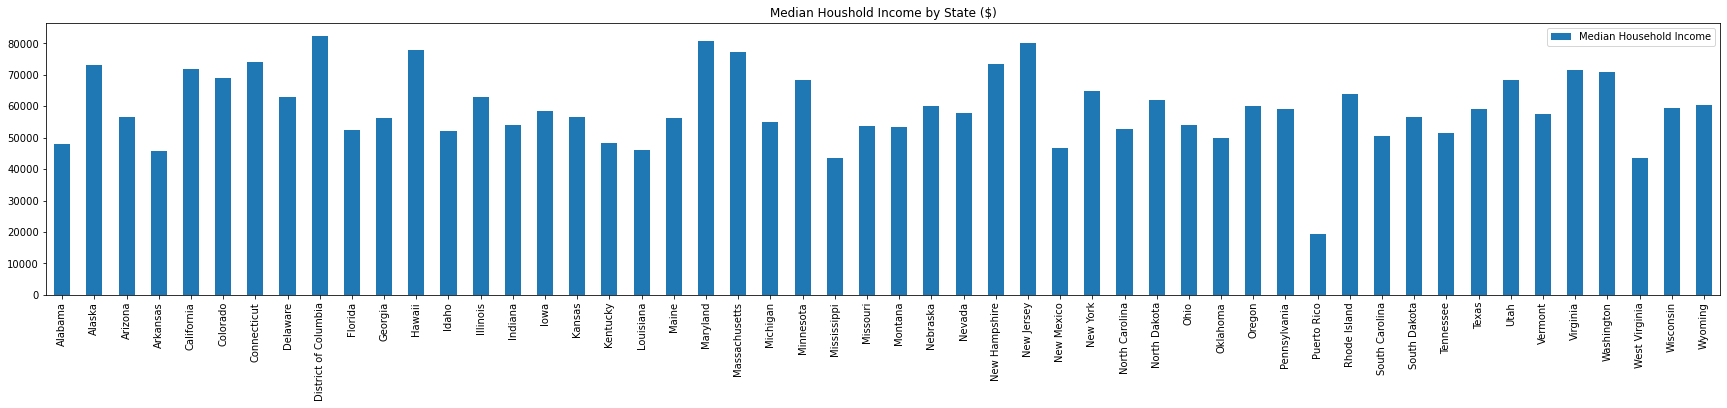

<Figure size 432x288 with 0 Axes>

In [228]:

bar_data.plot(kind='bar', figsize=(30,5))
plt.title("Median Houshold Income by State ($)")
plt.show()
plt.tight_layout()

In [366]:
combined.columns
combined.dtypes
combined['Median Household Income'] = pd.to_numeric(combined['Median Household Income'], downcast="integer")


combined['People Tested'] = pd.to_numeric(combined['People Tested'], downcast="integer")
combined.head()

,Median Household Income,Incident Rate,Testing Rate,Mortality Rate,Confirmed,Deaths,People Tested
Alabama,48123,3737.896898,26429.106795,1.563762,183276,2866,1295868
Alaska,73181,1706.661928,75558.714775,0.544654,12485,68,552746
Arizona,56581,3252.935923,23267.136227,2.478756,236772,5869,1693549
Arkansas,45869,3489.888674,42415.544548,1.706261,105318,1797,1280018
California,71805,2287.099868,44566.409235,1.919144,903684,17343,17609179


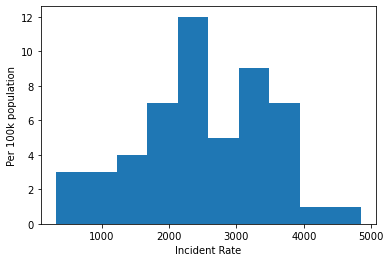

In [397]:
plt.hist(combined['Incident Rate'])
plt.xlabel('Incident Rate')
plt.ylabel('Per 100k population')
plt.show()
mean = combined['Incident Rate'].mean()
median = combined['Incident Rate'].median()

# print(combined['Incident Rate'].mode())

The r-squared is: 0.06514254832336244
P-value: 0.06783114997298934
Mean: 164797.11538461538
Median: 110077.0
y = -0.02x + 3794.25


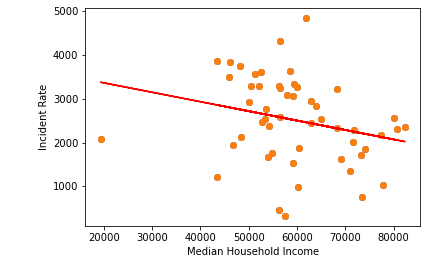

In [419]:
y_values = combined['Incident Rate']
x_values = combined['Median Household Income']
plt.scatter(x_values,y_values)
plt.ylabel('Incident Rate')
plt.xlabel('Median Household Income')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
print(f'P-value: {pvalue}')
print(f'Mean: {mean}')
print(f'Median: {median}')
print(line_eq)
plt.show()


In [420]:
incidence_rate = combined['Incident Rate']
quartiles = testing_rate.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Incident Rate is: {lowerq}")
print(f"The upper quartile of Incident Rate is: {upperq}")
print(f"The interquartile range of Incident Rate is: {iqr}")
print(f"The the median of Incident Rate is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Incident Rate is: 28196.90229171097
The upper quartile of Incident Rate is: 47129.53668825373
The interquartile range of Incident Rate is: 18932.63439654276
The the median of Incident Rate is: 35909.66228716033 
Values below -202.04930310316922 could be outliers.
Values above 75528.48828306787 could be outliers.


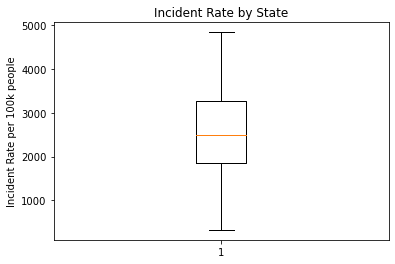

In [421]:
fig1, ax1 = plt.subplots()
ax1.set_title('Incident Rate by State')
ax1.set_ylabel('Incident Rate per 100k people')
ax1.boxplot(incidence_rate)
plt.show()

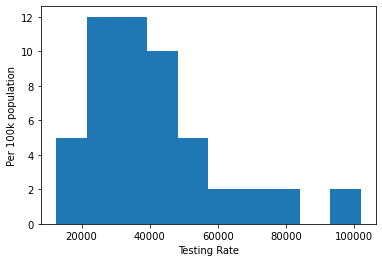

In [422]:
plt.hist(combined['Testing Rate'])
plt.xlabel('Testing Rate')
plt.ylabel('Per 100k population')
plt.show()
mean = combined['Testing Rate'].mean()
median = combined['Testing Rate'].median()
# print(combined['Mortality Rate'].mode())

The r-squared is: 0.1482122411220732
P-value: 0.004829609111746837
Mean: 40934.923531719585
Median: 35909.66228716033
y = 0.63x + 3503.99


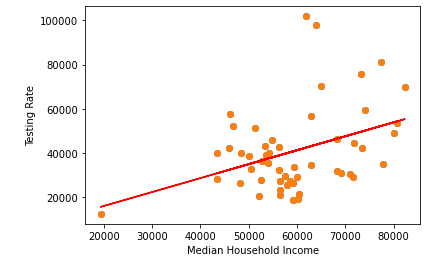

In [423]:
y_values = combined['Testing Rate']
x_values = combined['Median Household Income']
plt.scatter(x_values,y_values)
plt.ylabel('Testing Rate')
plt.xlabel('Median Household Income')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
print(f'P-value: {pvalue}')
print(f'Mean: {mean}')
print(f'Median: {median}')
print(line_eq)
plt.show()


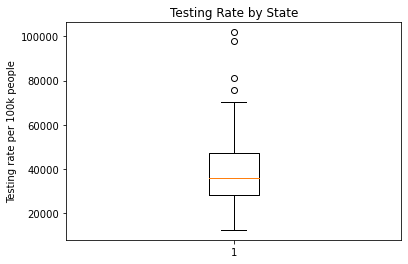

In [424]:
fig1, ax1 = plt.subplots()
ax1.set_title('Testing Rate by State')
ax1.set_ylabel('Testing rate per 100k people')
ax1.boxplot(testing_rate)
plt.show()

In [425]:
testing_rate = combined['Testing Rate']
quartiles = testing_rate.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of testing rates is: {lowerq}")
print(f"The upper quartile of testing rates is: {upperq}")
print(f"The interquartile range of testing rates is: {iqr}")
print(f"The the median of testing rates is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of testing rates is: 28196.90229171097
The upper quartile of testing rates is: 47129.53668825373
The interquartile range of testing rates is: 18932.63439654276
The the median of testing rates is: 35909.66228716033 
Values below -202.04930310316922 could be outliers.
Values above 75528.48828306787 could be outliers.


In [426]:
mortality_rate = combined['Mortality Rate']
quartiles = testing_rate.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Mortality Rate is: {lowerq}")
print(f"The upper quartile of Mortality Rate is: {upperq}")
print(f"The interquartile range of Mortality Rate is: {iqr}")
print(f"The the median of Mortality Rate is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Mortality Rate is: 28196.90229171097
The upper quartile of Mortality Rate is: 47129.53668825373
The interquartile range of Mortality Rate is: 18932.63439654276
The the median of Mortality Rate is: 35909.66228716033 
Values below -202.04930310316922 could be outliers.
Values above 75528.48828306787 could be outliers.


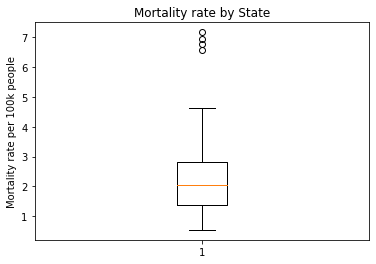

In [427]:
fig1, ax1 = plt.subplots()
ax1.set_title('Mortality rate by State')
ax1.set_ylabel('Mortality rate per 100k people')
ax1.boxplot(mortality_rate)
plt.show()

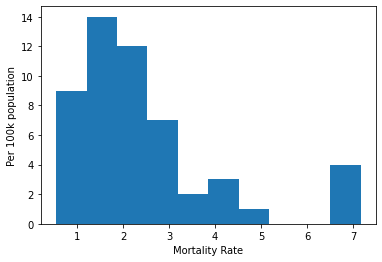

In [428]:
plt.hist(combined['Mortality Rate'])
plt.xlabel('Mortality Rate')
plt.ylabel('Per 100k population')
plt.show()
mean = combined['Mortality Rate'].mean()
median = combined['Mortality Rate'].median()
# print(combined['Mortality Rate'].mode())


The r-squared is: 0.15744785283135013
P-value: 0.003586813121472258
Mean: 2.426584838586157
Median: 2.04853390312161
y = 0.0x + -0.84


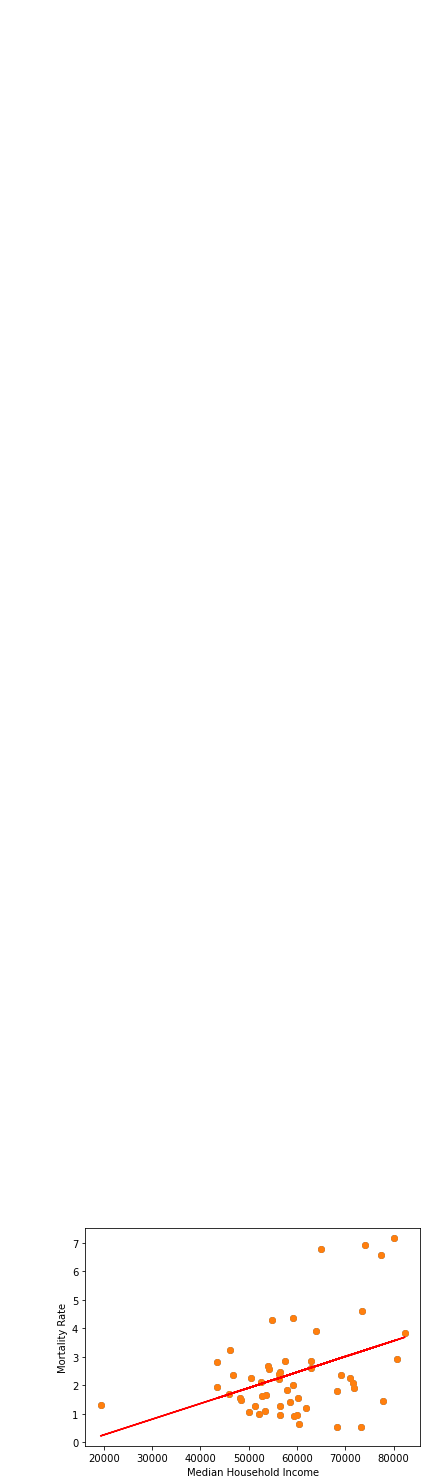

In [429]:
y_values = combined['Mortality Rate']
x_values = combined['Median Household Income']
plt.scatter(x_values,y_values)
plt.ylabel('Mortality Rate')
plt.xlabel('Median Household Income')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
print(f'P-value: {pvalue}')
print(f'Mean: {mean}')
print(f'Median: {median}')
print(line_eq)
plt.show()

In [430]:
combined.head()

,Median Household Income,Incident Rate,Testing Rate,Mortality Rate,Confirmed,Deaths,People Tested
Alabama,48123,3737.896898,26429.106795,1.563762,183276,2866,1295868
Alaska,73181,1706.661928,75558.714775,0.544654,12485,68,552746
Arizona,56581,3252.935923,23267.136227,2.478756,236772,5869,1693549
Arkansas,45869,3489.888674,42415.544548,1.706261,105318,1797,1280018
California,71805,2287.099868,44566.409235,1.919144,903684,17343,17609179


In [439]:
cum_cases = combined['Confirmed']
quartiles = cum_cases.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of confrimed cases is: {lowerq}")
print(f"The upper quartile of confrimed cases is: {upperq}")
print(f"The interquartile range of confrimed cases is: {iqr}")
print(f"The the median of confrimed cases is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of confrimed cases is: 40315.25
The upper quartile of confrimed cases is: 186092.0
The interquartile range of confrimed cases is: 145776.75
The the median of confrimed cases is: 110077.0 
Values below -178349.875 could be outliers.
Values above 404757.125 could be outliers.


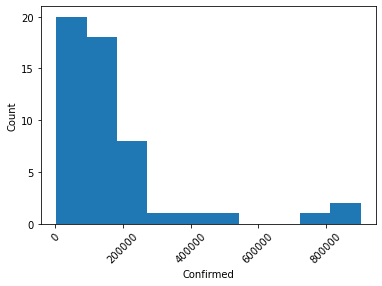

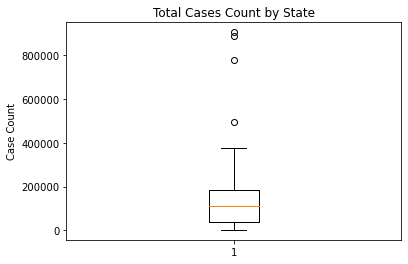

In [431]:
plt.hist(combined['Confirmed'])
plt.xlabel('Confirmed')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.yticks(ticks=(0, 5, 10, 15, 20))
plt.show()
mean = combined['Confirmed'].mean()
median = combined['Confirmed'].median()
# print(combined['Incident Rate'].mode())
cum_cases = combined['Confirmed']
fig1, ax1 = plt.subplots()
ax1.set_title('Total Cases Count by State')
ax1.set_ylabel('Case Count')
ax1.boxplot(cum_cases)
plt.show()

The r-squared is: 0.0008044497277496106
P-value: 0.8417969827788341
Mean: 164797.11538461538
Median: 110077.0
y = 0.49x + 135728.0


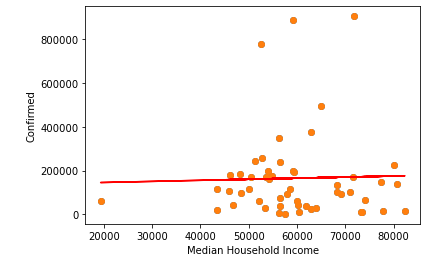

In [432]:
y_values = combined['Confirmed']
x_values = combined['Median Household Income']
plt.scatter(x_values,y_values)
plt.ylabel('Confirmed')
plt.xlabel('Median Household Income')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
print(f'P-value: {pvalue}')
print(f'Mean: {mean}')
print(f'Median: {median}')
print(line_eq)
plt.show()

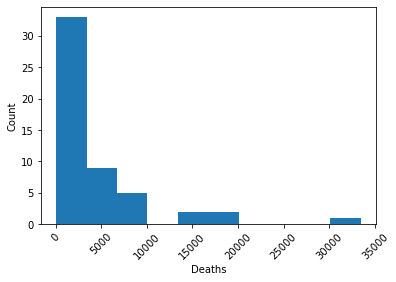

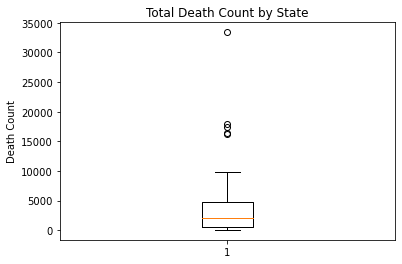

In [433]:
plt.hist(combined['Deaths'])
plt.xlabel('Deaths')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
mean = combined['Deaths'].mean()
median = combined['Deaths'].median()
# print(combined['Incident Rate'].mode())

total_death = combined['Deaths']
fig1, ax1 = plt.subplots()
ax1.set_title('Total Death Count by State')
ax1.set_ylabel('Death Count')
ax1.boxplot(total_death)
plt.show()

In [440]:
quartiles = total_death.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of total death count is: {lowerq}")
print(f"The upper quartile of total death count is: {upperq}")
print(f"The interquartile range of total death count is: {iqr}")
print(f"The the median of total death count is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of total death count is: 630.25
The upper quartile of total death count is: 4734.25
The interquartile range of total death count is: 4104.0
The the median of total death count is: 2007.5 
Values below -5525.75 could be outliers.
Values above 10890.25 could be outliers.


The r-squared is: 0.02883129583893291
P-value: 0.22881119213990536
Mean: 4322.961538461538
Median: 2007.5
y = 0.09x + -1050.05


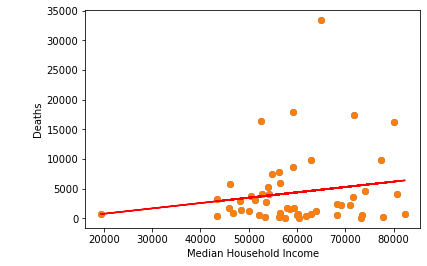

In [434]:
y_values = combined['Deaths']
x_values = combined['Median Household Income']
plt.scatter(x_values,y_values)
plt.ylabel('Deaths')
plt.xlabel('Median Household Income')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
print(f'P-value: {pvalue}')
print(f'Mean: {mean}')
print(f'Median: {median}')
print(line_eq)
plt.show()

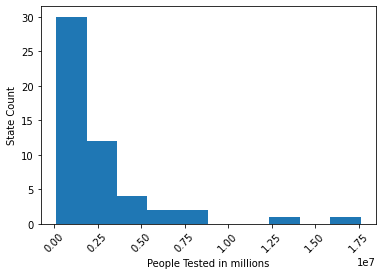

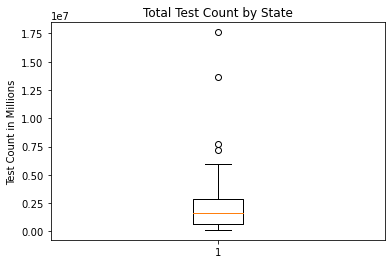

In [435]:
plt.hist(combined['People Tested'])
plt.xlabel('People Tested in millions')
plt.ylabel('State Count')
plt.xticks(rotation=45)
plt.show()
mean = combined['People Tested'].mean()
median = combined['People Tested'].median()
# print(combined['Incident Rate'].mode())

total_tested = combined['People Tested']
fig1, ax1 = plt.subplots()
ax1.set_title('Total Test Count by State')
ax1.set_ylabel('Test Count in Millions')
ax1.boxplot(total_tested)
plt.show()



In [441]:
quartiles = total_tested.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of total test count is: {lowerq}")
print(f"The upper quartile of total test count is: {upperq}")
print(f"The interquartile range of total test count is: {iqr}")
print(f"The the median of total test count is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of total test count is: 605777.75
The upper quartile of total test count is: 2819468.75
The interquartile range of total test count is: 2213691.0
The the median of total test count is: 1605896.5 
Values below -2714758.75 could be outliers.
Values above 6140005.25 could be outliers.


The r-squared is: 0.041988567499503464
P-value: 0.14505325634113686
y = 56.71x + -845105.22
Mean: 2525983.153846154
Median: 1605896.5


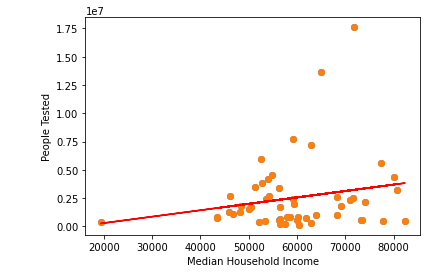

In [436]:
y_values = combined['People Tested']
x_values = combined['Median Household Income']
plt.scatter(x_values,y_values)
plt.ylabel('People Tested')
plt.xlabel('Median Household Income')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
print(f'P-value: {pvalue}')
print(line_eq)
print(f'Mean: {mean}')
print(f'Median: {median}')
plt.show()
